### Importing the libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras
#tfds.disable_progress_bar()-hides downloading option

### Find datasets
use command-tfds.list_builders() to look for datasets

In [2]:
builder=tfds.builder('rock_paper_scissors')
info=builder.info
info

tfds.core.DatasetInfo(
    name='rock_paper_scissors',
    full_name='rock_paper_scissors/3.0.0',
    description="""
    Images of hands playing rock, paper, scissor game.
    """,
    homepage='http://laurencemoroney.com/rock-paper-scissors-dataset',
    data_path='C:\\Users\\Hemu\\tensorflow_datasets\\rock_paper_scissors\\3.0.0',
    file_format=tfrecord,
    download_size=219.53 MiB,
    dataset_size=219.23 MiB,
    features=FeaturesDict({
        'image': Image(shape=(300, 300, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=3),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=372, num_shards=1>,
        'train': <SplitInfo num_examples=2520, num_shards=2>,
    },
    citation="""@ONLINE {rps,
    author = "Laurence Moroney",
    title = "Rock, Paper, Scissors Dataset",
    month = "feb",
    year = "2019",
    url = "http://laurencemoroney.com/rock-paper-scissors-data

### Prepare the data

In [3]:
ds_train=tfds.load(name='rock_paper_scissors',split='train')
ds_test=tfds.load(name='rock_paper_scissors',split='test')

### Show Examples

The old signature is deprecated and will be removed. Please change your call to `tfds.show_examples(ds, info)`


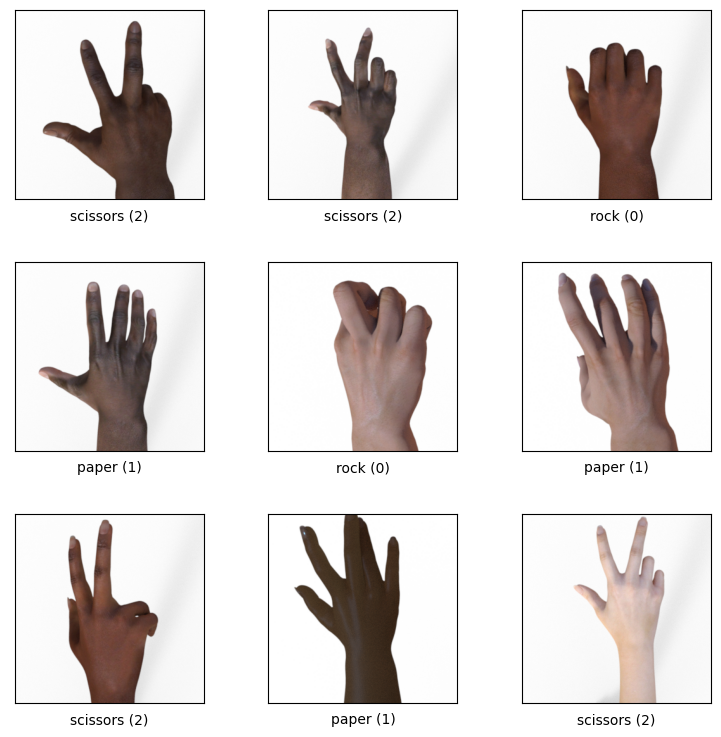

In [4]:
fig=tfds.show_examples(info,ds_train)

### Additional Data Preparation

In [5]:
#tensorflow data-set format to numpy format,also reduce no,of things NN has to learn,take only one color channel
train_images=np.array([example['image'].numpy()[:,:,0]for example in ds_train])
train_labels=np.array([example['label'].numpy() for example in ds_train])

In [6]:
test_images=np.array([example['image'].numpy()[:,:,0]for example in ds_test])
test_labels=np.array([example['label'].numpy() for example in ds_test])

In [7]:
type(train_images[0])
train_images.shape

(2520, 300, 300)

In [8]:
train_images=train_images.reshape(2520,300,300,1)
test_images=test_images.reshape(372,300,300,1)
train_images=train_images.astype('float32')
test_images=test_images.astype('float32')


In [9]:
#Normalize every value to be in between 0 and 1
train_images/=255
test_images/=255

In [10]:
train_images[0]

array([[[0.99607843],
        [0.99215686],
        [0.99607843],
        ...,
        [0.9843137 ],
        [0.98039216],
        [0.98039216]],

       [[0.99607843],
        [0.99607843],
        [0.99215686],
        ...,
        [0.98039216],
        [0.9843137 ],
        [0.9764706 ]],

       [[0.99607843],
        [0.99607843],
        [0.99607843],
        ...,
        [0.9843137 ],
        [0.98039216],
        [0.9882353 ]],

       ...,

       [[0.9882353 ],
        [0.9843137 ],
        [0.9882353 ],
        ...,
        [0.96862745],
        [0.9764706 ],
        [0.972549  ]],

       [[0.99215686],
        [0.99215686],
        [0.9843137 ],
        ...,
        [0.972549  ],
        [0.972549  ],
        [0.972549  ]],

       [[0.9882353 ],
        [0.99215686],
        [0.9882353 ],
        ...,
        [0.972549  ],
        [0.96862745],
        [0.98039216]]], dtype=float32)

### Train a Network (Basic Approach)-FCNN

In [11]:
model = tf.keras.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dense(3, activation='softmax')
])
#loss function
model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5, batch_size=32)

Epoch 1/5
79/79 [==============================] - 43s 526ms/step - loss: 23.7091 - accuracy: 0.4135
Epoch 2/5
79/79 [==============================] - 40s 506ms/step - loss: 1.9403 - accuracy: 0.6325
Epoch 3/5
79/79 [==============================] - 42s 538ms/step - loss: 0.5369 - accuracy: 0.8131
Epoch 4/5
79/79 [==============================] - 40s 508ms/step - loss: 0.4784 - accuracy: 0.8095
Epoch 5/5
79/79 [==============================] - 40s 511ms/step - loss: 0.4716 - accuracy: 0.8401


In [12]:
model.evaluate(test_images,test_labels)

12/12 [==============================] - 1s 44ms/step - loss: 2.2470 - accuracy: 0.4651


[2.246995687484741, 0.4650537669658661]

### Train a Network(convolutional approach)
pass a smaller grid over the larger grid image to extract the features


In [13]:
model=tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, 3,activation='relu',input_shape=(300,300,1)),
    tf.keras.layers.Conv2D(32, 3,activation='relu'),
    tf.keras.layers.Flatten(),
    keras.layers.Dense(3,activation='softmax')
  ])
model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5, batch_size=32)

Epoch 1/5
79/79 [==============================] - 407s 5s/step - loss: 3.1668 - accuracy: 0.6714
Epoch 2/5
79/79 [==============================] - 396s 5s/step - loss: 0.1915 - accuracy: 0.9627
Epoch 3/5
79/79 [==============================] - 352s 4s/step - loss: 0.0308 - accuracy: 0.9960
Epoch 4/5
79/79 [==============================] - 346s 4s/step - loss: 0.0170 - accuracy: 0.9980
Epoch 5/5
79/79 [==============================] - 348s 4s/step - loss: 0.0047 - accuracy: 1.0000


In [14]:
model.evaluate(test_images,test_labels)

12/12 [==============================] - 6s 481ms/step - loss: 1.6895 - accuracy: 0.4570


[1.6894587278366089, 0.45698925852775574]

In [15]:
#avoid the problem of overfitting here-reduce size of parameters

### Better Convolutional Network

In [16]:
#each pixel-twice of it ll be counted
model = keras.Sequential([
   keras.layers.AveragePooling2D(6,3, input_shape=(300,300,1)),
   keras.layers.Conv2D(64, 3, activation='relu'),
   keras.layers.Conv2D(32, 3, activation='relu'),
   keras.layers.MaxPool2D(2,2),#take max pixel in 2*2 grid
   keras.layers.Dropout(0.5),
   keras.layers.Flatten(),
   keras.layers.Dense(128, activation='relu'),#prevents direct entry to o/p
   keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5, batch_size=32)

Epoch 1/5
79/79 [==============================] - 46s 569ms/step - loss: 0.8424 - accuracy: 0.6484
Epoch 2/5
79/79 [==============================] - 45s 573ms/step - loss: 0.1588 - accuracy: 0.9663
Epoch 3/5
79/79 [==============================] - 44s 556ms/step - loss: 0.0401 - accuracy: 0.9913
Epoch 4/5
79/79 [==============================] - 42s 534ms/step - loss: 0.0222 - accuracy: 0.9940
Epoch 5/5
79/79 [==============================] - 41s 522ms/step - loss: 0.0073 - accuracy: 0.9992


In [17]:
model.evaluate(test_images,test_labels)

12/12 [==============================] - 1s 79ms/step - loss: 1.6927 - accuracy: 0.6156


[1.6926591396331787, 0.6155914068222046]

### Tuning the Network-->Hyperparameter Tuning

In [18]:
#!pip install -U keras-tuner

In [19]:
from kerastuner.tuners import RandomSearch

def build_model(hp):
  model = keras.Sequential()

  model.add(keras.layers.AveragePooling2D(6,3,input_shape=(300,300,1)))

  for i in range(hp.Int("Conv Layers", min_value=0, max_value=3)):
    model.add(keras.layers.Conv2D(hp.Choice(f"layer_{i}_filters", [16,32,64]), 3, activation='relu'))
  
  model.add(keras.layers.MaxPool2D(2,2))
  model.add(keras.layers.Dropout(0.5))
  model.add(keras.layers.Flatten())

  model.add(keras.layers.Dense(hp.Choice("Dense layer", [64, 128, 256, 512, 1024]), activation='relu'))

  model.add(keras.layers.Dense(3, activation='softmax'))

  model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
  
  return model

tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
)

tuner.search(train_images, train_labels, validation_data=(test_images, test_labels), epochs=10, batch_size=32)

Trial 5 Complete [00h 00m 31s]
val_accuracy: 0.551075279712677

Best val_accuracy So Far: 0.7956989407539368
Total elapsed time: 00h 24m 25s
INFO:tensorflow:Oracle triggered exit


INFO:tensorflow:Oracle triggered exit


In [20]:
#consider the best model
best_model=tuner.get_best_models()[0]

In [21]:
best_model.evaluate(test_images,test_labels)

12/12 [==============================] - 1s 69ms/step - loss: 0.6225 - accuracy: 0.7957


[0.622530996799469, 0.7956989407539368]

In [22]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 average_pooling2d (AverageP  (None, 99, 99, 1)        0         
 ooling2D)                                                       
                                                                 
 conv2d (Conv2D)             (None, 97, 97, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 48, 48, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 48, 48, 32)        0         
                                                                 
 flatten (Flatten)           (None, 73728)             0         
                                                                 
 dense (Dense)               (None, 1024)              7

In [23]:
tuner.results_summary()

Results summary
Results in .\untitled_project
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 2 summary
Hyperparameters:
Conv Layers: 1
Dense layer: 1024
layer_0_filters: 32
layer_1_filters: 64
layer_2_filters: 16
Score: 0.7956989407539368

Trial 00 summary
Hyperparameters:
Conv Layers: 2
Dense layer: 1024
layer_0_filters: 16
layer_1_filters: 16
Score: 0.7553763389587402

Trial 3 summary
Hyperparameters:
Conv Layers: 2
Dense layer: 64
layer_0_filters: 16
layer_1_filters: 64
layer_2_filters: 32
Score: 0.7096773982048035

Trial 01 summary
Hyperparameters:
Conv Layers: 3
Dense layer: 128
layer_0_filters: 64
layer_1_filters: 32
layer_2_filters: 16
Score: 0.6962365508079529

Trial 4 summary
Hyperparameters:
Conv Layers: 0
Dense layer: 256
layer_0_filters: 64
layer_1_filters: 32
layer_2_filters: 64
Score: 0.551075279712677


### Save and Load our Models

In [24]:
best_model.save('./my_model')

INFO:tensorflow:Assets written to: ./my_model\assets


INFO:tensorflow:Assets written to: ./my_model\assets


In [27]:
loaded_model = keras.models.load_model('./my_model')

In [28]:
loaded_model.evaluate(test_images,test_labels)

12/12 [==============================] - 1s 94ms/step - loss: 0.6225 - accuracy: 0.7957


[0.622530996799469, 0.7956989407539368]

### Plot Image from Numpy array

(300, 300, 3)

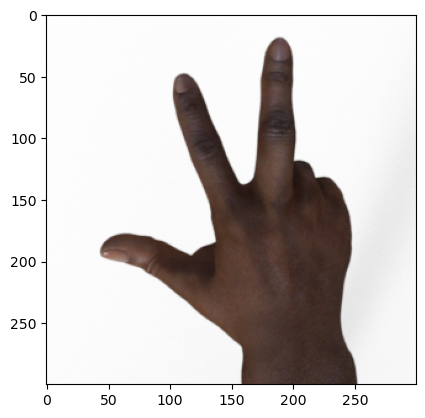

In [29]:
rgb_images = np.array([example['image'].numpy() for example in ds_train.take(1)])
rgb_image = rgb_images[0]
plt.imshow(rgb_image)
rgb_image.shape

#image = train_images[0].reshape(300,300)
#plt.imshow(image)

# green_images = np.array([example['image'].numpy()[:,:,1] for example in ds_train.take(1)])
# green_image = green_images[0].reshape(300,300)
# plt.imshow(green_image, cmap='Greys_r')-greyscale

### Additional Info-Convert PNG/JPG to Numpy Format

In [30]:
import imageio

im = imageio.imread('https://upload.wikimedia.org/wikipedia/commons/thumb/8/84/Massachusetts_State_House_-_panoramio_%281%29.jpg/280px-Massachusetts_State_House_-_panoramio_%281%29.jpg')

print(type(im))

im_np = np.asarray(im)#conversion

print(im_np.shape)

C:\Users\Hemu\AppData\Local\Temp\ipykernel_9540\175393372.py:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imageio.imread('https://upload.wikimedia.org/wikipedia/commons/thumb/8/84/Massachusetts_State_House_-_panoramio_%281%29.jpg/280px-Massachusetts_State_House_-_panoramio_%281%29.jpg')


<class 'imageio.core.util.Array'>
(186, 280, 3)
